#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [20]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [21]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [26]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
x_img_train_normalize = x_img_train_normalize.reshape(x_img_train_normalize.shape[0],-1)
x_img_test_normalize = x_img_test_normalize.reshape(x_img_test_normalize.shape[0],-1)

In [27]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [13]:
model = Sequential()

In [14]:
#卷積層1

In [23]:
# model.add(Conv2D(filters=32,kernel_size=(3,3),
#                  input_shape=(32, 32,3), 
#                  activation='relu', 
#                  padding='same'))

In [24]:
# model.add(Dropout(rate=0.25))

In [25]:
# model.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
#卷積層2與池化層2

In [27]:
# model.add(Conv2D(filters=64, kernel_size=(3, 3), 
#                  activation='relu', padding='same'))

In [28]:
# model.add(Dropout(0.25))

In [29]:
# model.add(MaxPooling2D(pool_size=(2, 2)))

In [30]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [31]:
# model.add(Flatten())
# model.add(Dropout(rate=0.25))

In [32]:
# model.add(Dense(1024, activation='relu'))
# # model.add(Dropout(rate=0.25))

In [29]:

model.add(Dense(units= 256, input_dim=x_img_train.shape[1], activation="relu"))
model.add(Dense(units= 64, activation="relu"))
model.add(Dense(units= 10, activation='softmax'))

In [32]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 803,786
Trainable params: 803,786
Non-trainable params: 0
_________________________________________________________________
None

In [58]:
"""
以視覺畫方式檢視訓練過程
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def show_train_history(results):
    for i, result in enumerate(results):
        history = result["model"].history.history
        tag = "({})".format(result["tag"])
        df_acc = pd.DataFrame({"acc"+tag:history["acc"], "val_acc"+tag:history["val_acc"]})
        df_loss = pd.DataFrame({"loss"+tag:history["loss"], "val_loss"+tag:history["val_loss"]})
        if i ==0:
            df_acc_results = df_acc.copy()
            df_loss_results = df_loss.copy()
        else:
            df_acc_results= pd.concat([df_acc_results, df_acc], axis=1)
            df_loss_results= pd.concat([df_loss_results, df_loss], axis=1)    

    fig, ax = plt.subplots(1,2, figsize=(18,5))
    styles = ['bs-','ro-','y^-', 'g--', 'rs-', 'g^-']    
    g1 = df_acc_results.plot.line(style=styles, ax =ax[0])
    g1.set_xlabel("Epoch")
    g1.set_ylabel("Acc") 
    
    g2 = df_loss_results.plot.line(style=styles, ax =ax[1])
    g2.set_xlabel("Epoch")
    g2.set_ylabel("Loss") 
    return df_acc_results, df_loss_results

# 載入之前訓練的模型

In [59]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [60]:
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
import pandas as pd

scores=list()
results=list()

loss_func=["MSE", "categorical_crossentropy", "binary_crossentropy"]
epochs=15

for lf in loss_func:
    print("Perform loss funcion {}".format(lf))
    model.compile(loss=lf, optimizer='adam', metrics=['accuracy'])    
    train_history = model.fit(x=x_img_train_normalize, y=y_label_train_OneHot, validation_split=0.25, epochs=epochs, batch_size=256, verbose=1) 
    results.append({"tag":lf, "model":model})
    score = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
    scores.append({"lf":lf, "score":score})

Perform loss funcion MSE
Train on 37500 samples, validate on 12500 samples
Epoch 1/15
37500/37500 [==============================] - 17s 456us/step - loss: 0.0525 - acc: 0.6012 - val_loss: 0.0685 - val_acc: 0.4772
Epoch 2/15
37500/37500 [==============================] - 12s 308us/step - loss: 0.0526 - acc: 0.5980 - val_loss: 0.0669 - val_acc: 0.4778
Epoch 3/15
37500/37500 [==============================] - 12s 310us/step - loss: 0.0521 - acc: 0.6028 - val_loss: 0.0681 - val_acc: 0.4736
Epoch 4/15
37500/37500 [==============================] - 12s 313us/step - loss: 0.0517 - acc: 0.6085 - val_loss: 0.0673 - val_acc: 0.4772
Epoch 5/15
37500/37500 [==============================] - 12s 315us/step - loss: 0.0524 - acc: 0.6036 - val_loss: 0.0674 - val_acc: 0.4805
Epoch 6/15
37500/37500 [==============================] - 12s 322us/step - loss: 0.0521 - acc: 0.6028 - val_loss: 0.0684 - val_acc: 0.4712
Epoch 7/15
37500/37500 [==============================] - 12s 317us/step - loss: 0.0516 - a

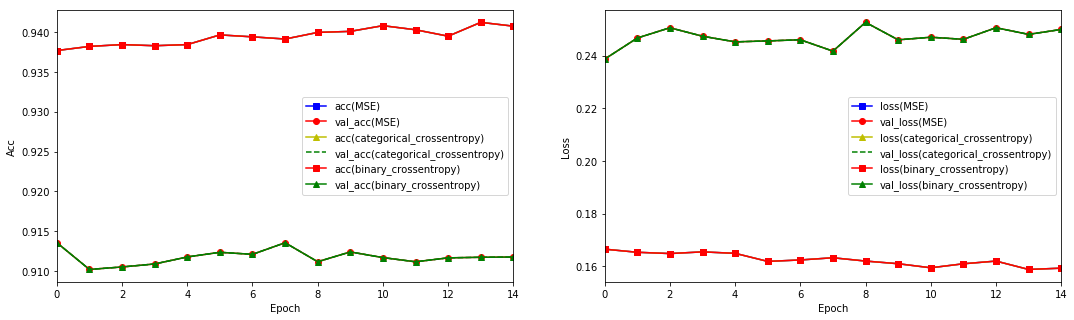

In [61]:
"""
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

df_acc_results, df_loss_results = show_train_history(results)

In [62]:
df_scores = pd.DataFrame(scores)
df_scores

,lf,score
0,MSE,"[0.06696738225221634, 0.4938]"
1,categorical_crossentropy,"[1.5656983966827394, 0.4917]"
2,binary_crossentropy,"[0.2499014169216156, 0.9108200332641602]"
